In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv('/Users/nashaat/Downloads/churn_data.csv')
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [12]:
import numpy as np
df= np.round(df, decimals=2)
df.head()

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,US,iOS,756.01,39,2,582.02,92,2,212.32,...,280.40,60,0,700.18,66,3,382.72,59,0,1
2,52,US,iOS,594.84,59,0,251.27,33,2,186.91,...,863.00,89,1,571.33,28,3,570.20,89,0,1
3,43,Canada,Android,453.22,21,3,124.18,92,0,316.49,...,858.55,60,5,198.22,38,1,187.48,79,5,1
4,41,US,iOS,621.45,95,1,134.36,46,5,162.95,...,404.59,59,3,565.40,78,1,281.42,63,4,1
5,41,US,iOS,660.74,48,5,713.27,54,2,736.90,...,178.14,85,1,574.38,34,2,544.98,28,2,1


Feature Enginnering: Noticed that month spending has more 2 decimals which is neglible/not used. So rounded all columns to 2 decimal places.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [5]:
df.drop('Unnamed: 0', axis=1, inplace = True)
df.set_index('CustomerID', inplace=True)


We dropped the unnamed column and set cutomer id as our index.
First step of data cleaning is check if there are null values. Initial analysis shows that there are no null values for the columns listed here. Therefore, we don't have to worry about dropping (where we drop empty values if it's 10% or less missing) or filling in any null values with median and/or range depending on the circumstances. 

Data Exploration:

First, we would start by exploring the provided dataset to gain insights into customer churn and potential factors influencing it. we would look at summary statistics, distributions, and correlations between different features.
Check basic statistics for each feature, such as mean, median, and standard deviation


In [20]:
df.describe(include='all')

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,42.698500,NaN,NaN,482.593341,64.657700,2.488800,476.297132,63.118000,2.517400,481.965314,...,473.630492,58.227900,2.487000,472.671132,56.968900,2.519500,478.629313,56.512600,2.496300,0.70000
std,12.495528,NaN,NaN,237.961470,29.329527,1.711306,237.491825,28.933247,1.703639,235.535379,...,235.090342,25.909251,1.721083,234.288903,25.615119,1.702266,233.135237,25.263995,1.713674,0.45828
min,20.000000,NaN,NaN,45.150000,12.000000,0.000000,46.280000,12.000000,0.000000,45.790000,...,45.780000,12.000000,0.000000,45.140000,12.000000,0.000000,45.090000,12.000000,0.000000,0.00000
25%,32.000000,NaN,NaN,275.977500,39.000000,1.000000,268.425000,38.000000,1.000000,283.140000,...,268.467500,36.000000,1.000000,269.432500,35.000000,1.000000,276.510000,35.000000,1.000000,0.00000
50%,43.000000,NaN,NaN,482.175000,65.000000,2.000000,474.440000,63.000000,3.000000,480.440000,...,472.390000,58.000000,2.000000,472.530000,57.000000,3.000000,481.870000,56.000000,3.000000,1.00000
75%,53.000000,NaN,NaN,688.900000,90.000000,4.000000,680.827500,88.000000,4.000000,684.510000,...,680.920000,80.000000,4.000000,673.600000,78.000000,4.000000,681.397500,77.000000,4.000000,1.00000


From here we tried to see if any stats such as monthly support calls jumps out from any of the months. However, appears that in all months like 1,2,3 or 10,11, 12 all has similar 2.5 support calls. Then, I checked for spend column and analyzed that spending ranges monthly $482 to $472 on average without any particular month having a significant jump. However, when it comes to no. of items purchased on average each month it seems to be decreasing on average for example (month 1 has 64 items compared to 56 on month 12)

In [18]:
df.groupby(['Location'])['Churn'].agg(['count','sum'])

,count,sum
Location,,
Australia,725,0
Canada,4258,3495
Great Britain,762,0
US,4255,3505


Interesting observation: individuals from Australia and GB doesn't have any churn!!!. From the above stats, we see that in USA churn rate is (3505/4255) or 82% & in Canada it is identical (3495/4258) or 82%. 

In [40]:
df.groupby(['Device'])['Churn'].agg(['count','sum'])

,count,sum
Device,,
0,5736,4840
1,4264,2160


Looks like devices have an impact. Here 0 rep Android and 1 rep IOS or iphones. So android churn rate (4840/5736) or 84 percent & Iphone is (2160/4264) or 50% only

<Axes: xlabel='Churn', ylabel='Age'>

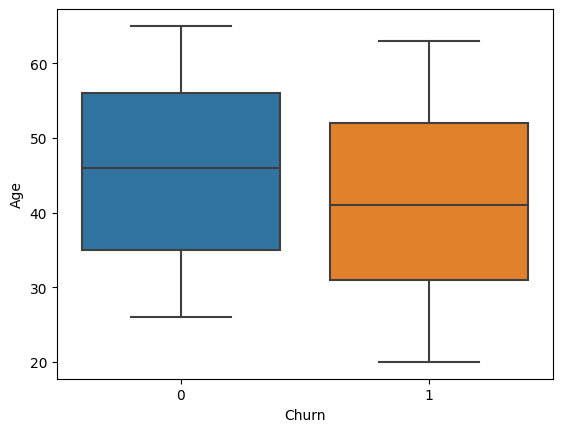

In [7]:
 sns.boxplot(x='Churn', y='Age', data=df)


Appears that individuals of younger age have higher churn rate than older (42-43 for median churn vs 46-47 for no churn).

Thus, our hypothesis: lower age, using android devices and living in USA or Canada leads to higher churn numbers. 

Now lets do feature enginnering to make dummies to get our categorical variables ready for machine learning models. We used Label Encoder for to transform the categorical variables into numerical

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in ['Location', 'Device']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

df

,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,Month_3_Spend,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
CustomerID,,,,,,,,,,,,,,,,,,,,,
1,46,3,1,756.01,39,2,582.02,92,2,212.32,...,280.40,60,0,700.18,66,3,382.72,59,0,1
2,52,3,1,594.84,59,0,251.27,33,2,186.91,...,863.00,89,1,571.33,28,3,570.20,89,0,1
3,43,1,0,453.22,21,3,124.18,92,0,316.49,...,858.55,60,5,198.22,38,1,187.48,79,5,1
4,41,3,1,621.45,95,1,134.36,46,5,162.95,...,404.59,59,3,565.40,78,1,281.42,63,4,1
5,41,3,1,660.74,48,5,713.27,54,2,736.90,...,178.14,85,1,574.38,34,2,544.98,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,35,2,1,496.17,84,1,735.15,60,2,656.08,...,708.94,77,4,672.76,23,5,710.68,60,4,0
9997,59,2,1,138.84,76,3,673.60,52,4,665.93,...,736.39,57,4,379.11,75,4,870.23,15,3,0
9998,45,3,1,533.29,106,4,367.14,41,1,249.49,...,567.42,50,3,633.11,89,5,624.40,35,4,0


##Baseline Models##

In [32]:
df.columns


Index(['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls', 'Churn'],
      dtype='object')

In [35]:
log = LogisticRegression()
log.fit(df[['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls']], df['Churn'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
pred = log.predict(df[['Age', 'Location', 'Device', 'Month_1_Spend', 'Month_1_Items',
       'Month_1_Support_Calls', 'Month_2_Spend', 'Month_2_Items',
       'Month_2_Support_Calls', 'Month_3_Spend', 'Month_3_Items',
       'Month_3_Support_Calls', 'Month_4_Spend', 'Month_4_Items',
       'Month_4_Support_Calls', 'Month_5_Spend', 'Month_5_Items',
       'Month_5_Support_Calls', 'Month_6_Spend', 'Month_6_Items',
       'Month_6_Support_Calls', 'Month_7_Spend', 'Month_7_Items',
       'Month_7_Support_Calls', 'Month_8_Spend', 'Month_8_Items',
       'Month_8_Support_Calls', 'Month_9_Spend', 'Month_9_Items',
       'Month_9_Support_Calls', 'Month_10_Spend', 'Month_10_Items',
       'Month_10_Support_Calls', 'Month_11_Spend', 'Month_11_Items',
       'Month_11_Support_Calls', 'Month_12_Spend', 'Month_12_Items',
       'Month_12_Support_Calls']])

In [38]:
print(accuracy_score(pred,df['Churn']))
print(f1_score(pred,df['Churn']))
print(precision_score(pred,df['Churn']))
print(recall_score(pred,df['Churn']))

0.7441
0.833712391968289
0.9164285714285715
0.7646918583859816


Here we can see that logistic regression gives a descent F1 score of 0.83. However, we can investigate further to make the F1 score better. So, lets choose which variables have the storngest correlation on churn. 

In [39]:
pd.DataFrame([log.feature_names_in_,log.coef_.flatten()]).T


,0,1
0,Age,-0.022452
1,Location,0.393222
2,Device,-0.287341
3,Month_1_Spend,0.000527
4,Month_1_Items,0.004178
5,Month_1_Support_Calls,0.015923
6,Month_2_Spend,0.000216
7,Month_2_Items,0.003838
8,Month_2_Support_Calls,0.104232
9,Month_3_Spend,0.0004


As confirmed by our initial hypothesis, we see variables with strongest correlation coefficient are location (0.39) & device (-0.29). However, age doesn't seem to have a strong coefficient in this case with -0.02. Other factors with stong correlation include month 2 support calls w/ 0.1,  month 4 support calls with 0.09  and month 5 support with 0.09 as well. Lets use these to build our other models.

In [42]:
x = df[['Location', 'Device','Month_4_Support_Calls', 'Month_2_Support_Calls',
       'Month_5_Support_Calls']]
y = df['Churn']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1234)


In [44]:
from sklearn.svm import SVC


In [45]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC(kernel='linear')

In [46]:
knn.fit(x_train, y_train)
log.fit(x_train, y_train)
nb.fit(x_train, y_train)
svc.fit(x_train, y_train)


SVC(kernel='linear')

In [47]:
pred_knn = knn.predict(x_test)
pred_log = log.predict(x_test)
pred_nb = nb.predict(x_test)
pred_sv = svc.predict(x_test)

In [48]:
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))
print(f1_score(pred_sv,y_test))

0.8677766895200784
0.8051519154557464
0.8051519154557464
0.8051519154557464


It appears KNN has the highest F1 score (log, nb and sv) here out of all models with 0.86. Lets do hyperparameter tuning for knn

In [49]:
#KNN hyperparameter tuning
# select parameters
params_knn = {'n_neighbors': list(range(1,200)), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, n_iter = 50, scoring='recall')
randomsearch_knn.fit(x_train, y_train)
print("Best parameters for KNN - randomsearch: ", randomsearch_knn.best_params_)



Best parameters for KNN - randomsearch:  {'weights': 'uniform', 'n_neighbors': 156, 'metric': 'manhattan'}


Best knn parameters printed above

In [53]:
#Applying the best parameters and doing cross validation
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)
cv_scores_knn = cross_val_score(knn_best, x_train, y_train, cv=10, scoring='precision')
print("Cross-validation scores for KNN: ", cv_scores_knn)
knn_best.fit(x_train, y_train)
y_pred_knn = knn_best.predict(x_test)
print("Test accuracy for KNN: ", accuracy_score(y_test, y_pred_knn))


Cross-validation scores for KNN:  [0.74005305 0.73809524 0.73872679 0.73677249 0.73193167 0.726206
 0.73774834 0.73386034 0.73386034 0.73970784]
Test accuracy for KNN:  0.7655


In [54]:
#Compute metrics
print("\nK-Nearest Neighbors Metrics: ")
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_knn))
print("Accuracy: ", accuracy_score(y_test, y_pred_knn))
print("Precision: ", precision_score(y_test, y_pred_knn))
print("Recall: ", recall_score(y_test, y_pred_knn))
print("F1 Score: ", f1_score(y_test, y_pred_knn))


K-Nearest Neighbors Metrics: 
Confusion Matrix:  [[ 103  469]
 [   0 1428]]
Accuracy:  0.7655
Precision:  0.7527675276752768
Recall:  1.0
F1 Score:  0.8589473684210527


Question:

Explain your model to a business executive. Your explanation should include the following:
Your data exploration findings, initial hypothesis, and whether the hypothesis proved true.
Your approach for building and evaluating the model. 
The final model you selected and how you know this is the best model for the problem.
How the model should be used by the business, in business process.

Answer/Conclusion:

My initial exploratory data analysis revealed that Andorid users have higher churn (84%) vs android users (50%). In addition, only USA and Canada have churns with each being around 82% where as Aus and GB have no churns. I depicted age graph and found that these people who churn have slightly lower age (42-43) on average compared to those who don't (46-47).

Hence my initial hypothesis was lower age, using android devices and living in USA or Canada leads to higher churn numbers. However, after building a baseline model with logistic regression model with all variables like month 1 spend, location, device and so on, we uncovered more definitive correlation coefficeint as to which variables have the most impact. Here, location (0.39) & device (-0.29) highest correaltion coeffecient like we intially hypothesized. However, age doesn't seem to have a strong coefficient in this case with -0.02. Other factors with stong correlation include month 2 support calls w/ 0.1,  month 4 support calls with 0.09  and month 5 support with 0.09 as well. Thus, my initial hypothesis was mostly correct with the exception of age factor.

We used these variables to build our other models of k-nearest neighbors (knn), logistic regression, support vector machine and naive bayes classifier.

We discovered that knn have the highest f1 score 0.87 out of all the models. F1 score means accuracy, the higher or closer to 1 the more accurate the model. Then we did hyperparameter tuning to optimize the knn model to see if we can further improve the F1 score. We optimized the model based on recall since it indicates the proportion of positive results yielded by the model by the total number of positive labels in the dataset. In this case, the recall reveals the proportion of churns identified correctly by the total number of churns.

In addition, we ran cross validation 10 times to calculate the average performacne of the model in F1 score. So, the knn model has a 1.0 score on recall.

In the business process, this knn model is used to predict whether a customer will churn or not, with 86% accuracy, based on customers 'Location', 'Device', months 2,4 and 5's support call volume. So, if the customer lives in US or Canada, uses an android device, have over 2.5 calls to support staff on months 2,4, and 5 then the customer is likely to churn

